# Plot maps of surface atmospheric diagnostics

SAT

10 m wind speed (mean, std, variance)

In [1]:
import cosima_cookbook as cc
from dask.distributed import Client

import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
import cartopy.crs as ccrs
import matplotlib.path as mpath
import numpy as np
%matplotlib inline

# To costumise subplots
import matplotlib.gridspec as gridspec

#import glob

#import xesmf
#import os
#import pandas as pd
#import calendar
#from tqdm import tqdm_notebook
from datetime import timedelta

# Stop annoying warnings coming out of xarray.
import warnings
warnings.filterwarnings('ignore')

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 125.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:38607,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 125.20 GiB
Comm: tcp://127.0.0.1:38505,Total threads: 4
Dashboard: /proxy/33459/status,Memory: 17.89 GiB
Nanny: tcp://127.0.0.1:36787,


In [3]:
session_CM2  = cc.database.create_session('/g/data/p73/archive/non-CMIP/ACCESS-CM2/CM2.db')
expt_CM2_025 = 'cj877'
expt_CM2_1   = 'bz687'

In [4]:
# OM2 database
session_OM2  = cc.database.create_session('/g/data/ik11/databases/cosima_master.db')
expt_OM2_025 = '025deg_jra55_ryf9091_gadi'
expt_OM2_1   = '1deg_jra55_ryf9091_gadi'

If you get a 'read-only database' warning, it is because the database has not finished building. 

In [5]:
path_to_data = '/g/data/x77/wgh581/Post_Process/ACCESS_CM2_025/'
fig_path     = '/g/data/x77/wgh581/Figures/Figures_ACCESS_CM2/'

In [6]:
# Plotting info
ft_size = 16
plt.rcParams.update({'font.size': ft_size})
month_label = ['J','F','M','A','M','J','J','A','S','O','N','D']

Load in previously extracted wind speed (done at end of this script)

In [7]:
wind_CM2_025 = xr.open_dataarray(path_to_data + 'wind_speed_10m_400_499.nc')
wind_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/wind_speed_10m_400_499_CM2_1.nc')

In [51]:
u_wind_CM2_025 = xr.open_dataarray(path_to_data + 'u_wind_10m_400_499.nc')
u_wind_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/u_wind_10m_400_499_CM2_1.nc')

In [52]:
v_wind_CM2_025 = xr.open_dataarray(path_to_data + 'v_wind_10m_400_499.nc')
v_wind_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/v_wind_10m_400_499_CM2_1.nc')

In [11]:
sat_CM2_025 = xr.open_dataarray(path_to_data + 'sat_400_499.nc')
sat_CM2_1   = xr.open_dataarray(path_to_data + 'Comparison_ACCESS_CM2_1/sat_400_499_CM2_1.nc')

Annual average for CM2-1 data

In [55]:
u_wind_CM2_1 = u_wind_CM2_1.resample(time='Y').mean()
v_wind_CM2_1 = v_wind_CM2_1.resample(time='Y').mean()

Plotting stuff

In [8]:
# Use cartopy land for now (option to update to model land but will change with resolution)
import cartopy.feature as cft
land_50m = cft.NaturalEarthFeature('physical', 'land', '50m', edgecolor='black', facecolor='darkgrey', linewidth=0.5)

In [9]:
CLEX_Red = '#DA1E48'
CLEX_Pink = '#F48580'
CLEX_SkyBlue = '#00BDF2'
CLEX_MidBlue = '#008DD0'
CLEX_CobaldBlue = '#0066B3'
CLEX_MidnightBlue = '#113559'
CLEX_Gray = '#4D4D47'

Mean for both

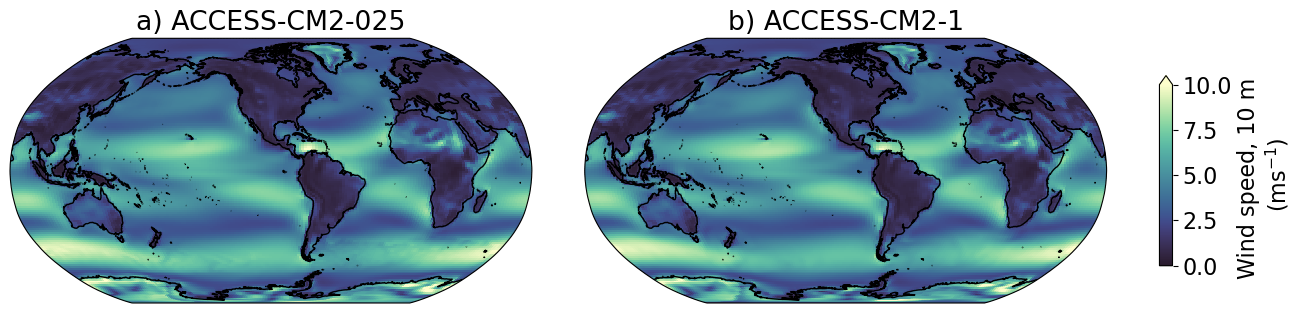

In [52]:
fig = plt.figure(figsize=(15,5))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = wind_CM2_025.mean('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=10, cmap=cm.cm.deep_r, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
wind_CM2_1.mean('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=10, cmap=cm.cm.deep_r, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) ACCESS-CM2-1')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 11, 2.5), label='Wind speed, 10 m \n(ms$^{-1}$)', extend='max') 
#units_label = evap_OM2_1_clim_mmd.units
#cbar = plt.colorbar(sc, cax=cbar_ax, label='Evaporation ('+units_label+')', extend='max', ticks=np.arange(0,10)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_ACCESS_CM2_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

Difference plot

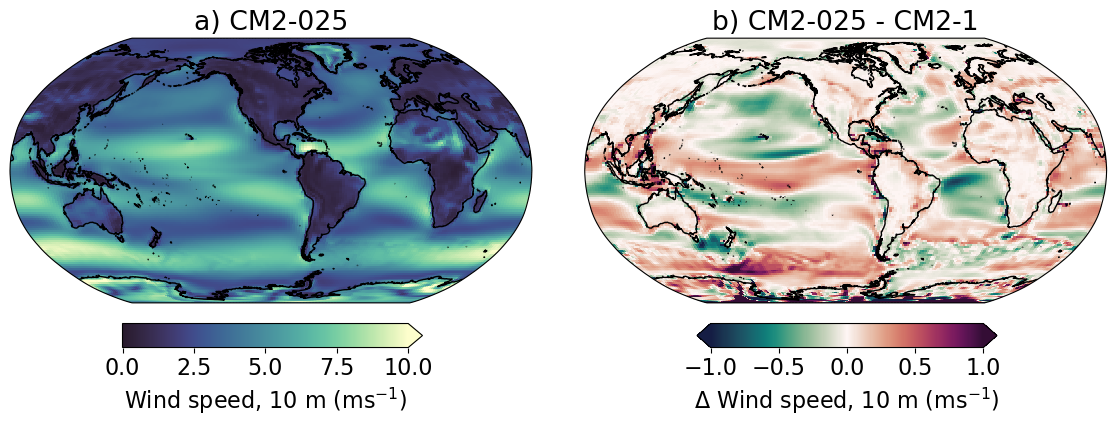

In [10]:
fig = plt.figure(figsize=(15,6))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15) # height_ratios=[1,1,1,1,0.1],

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = wind_CM2_025.mean('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=10, cmap=cm.cm.deep_r, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) CM2-025')

#cbar_ax = fig.add_subplot(gs[4, 0])
cbar_ax = fig.add_axes([0.20, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 11, 2.5), label='Wind speed, 10 m (ms$^{-1}$)', extend='max', orientation='horizontal') 

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = (wind_CM2_025.mean('time') - wind_CM2_1.mean('time')).plot(transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap=cm.cm.curl, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) CM2-025 - CM2-1')

cbar_ax = fig.add_axes([0.583, 0.2, 0.2, 0.04])
#cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-1, 1.1, 0.5), label='$\Delta$ Wind speed, 10 m (ms$^{-1}$)', extend='both', orientation='horizontal') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_ACCESS_CM2_diff_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300, transparent=True);

Standard deviation

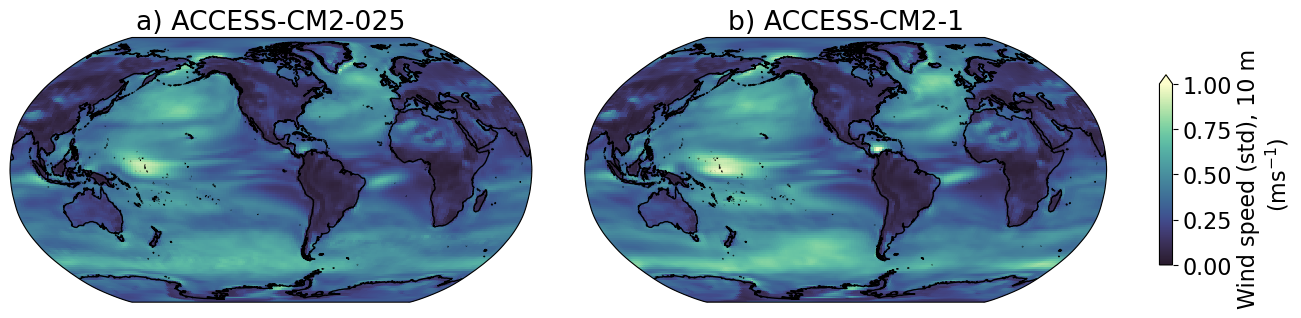

In [54]:
fig = plt.figure(figsize=(15,5))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = wind_CM2_025.std('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap=cm.cm.deep_r, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
wind_CM2_1.std('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap=cm.cm.deep_r, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) ACCESS-CM2-1')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 1.1, 0.25), label='Wind speed (std), 10 m \n(ms$^{-1}$)', extend='max') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_ACCESS_CM2_std_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

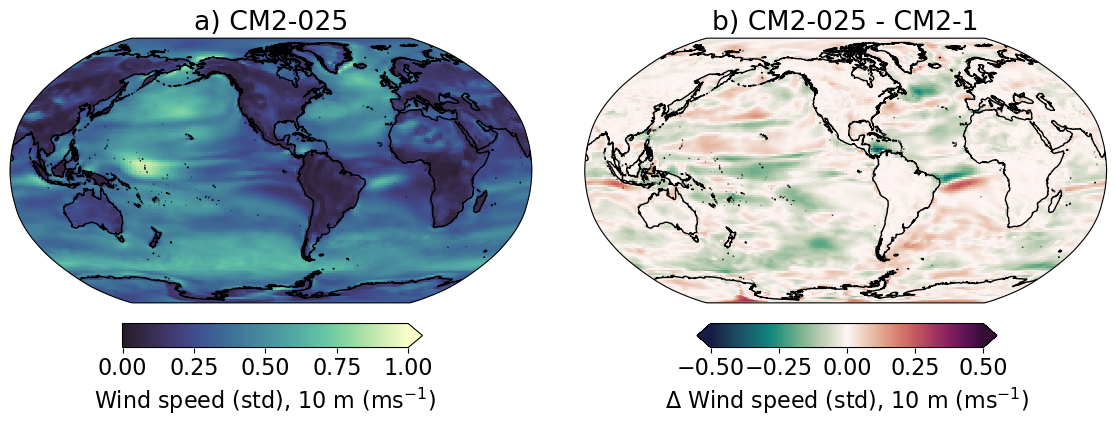

In [55]:
fig = plt.figure(figsize=(15,6))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15) # height_ratios=[1,1,1,1,0.1],

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = wind_CM2_025.std('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=1, cmap=cm.cm.deep_r, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) CM2-025')

#cbar_ax = fig.add_subplot(gs[4, 0])
cbar_ax = fig.add_axes([0.20, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 1.1, 0.25), label='Wind speed (std), 10 m (ms$^{-1}$)', extend='max', orientation='horizontal') 

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = (wind_CM2_025.std('time') - wind_CM2_1.std('time')).plot(transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap=cm.cm.curl, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) CM2-025 - CM2-1')

cbar_ax = fig.add_axes([0.583, 0.2, 0.2, 0.04])
#cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-0.5, 0.51, 0.25), label='$\Delta$ Wind speed (std), 10 m (ms$^{-1}$)', extend='both', orientation='horizontal') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_wind_ACCESS_CM2_diff_std_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

Individual wind components

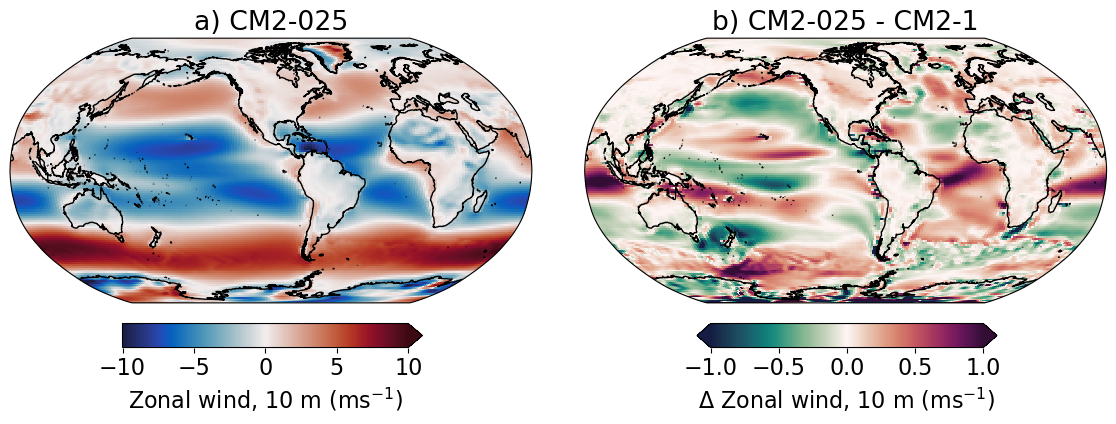

In [61]:
fig = plt.figure(figsize=(15,6))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15) # height_ratios=[1,1,1,1,0.1],

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = u_wind_CM2_025.mean('time').plot(transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap=cm.cm.balance, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) CM2-025')

#cbar_ax = fig.add_subplot(gs[4, 0])
cbar_ax = fig.add_axes([0.20, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-10, 11, 5), label='Zonal wind, 10 m (ms$^{-1}$)', extend='max', orientation='horizontal') 

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = (u_wind_CM2_025.mean('time') - u_wind_CM2_1.mean('time')).plot(transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap=cm.cm.curl, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) CM2-025 - CM2-1')

cbar_ax = fig.add_axes([0.583, 0.2, 0.2, 0.04])
#cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-1, 1.1, 0.5), label='$\Delta$ Zonal wind, 10 m (ms$^{-1}$)', extend='both', orientation='horizontal') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_u_wind_ACCESS_CM2_diff_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300, transparent=True);

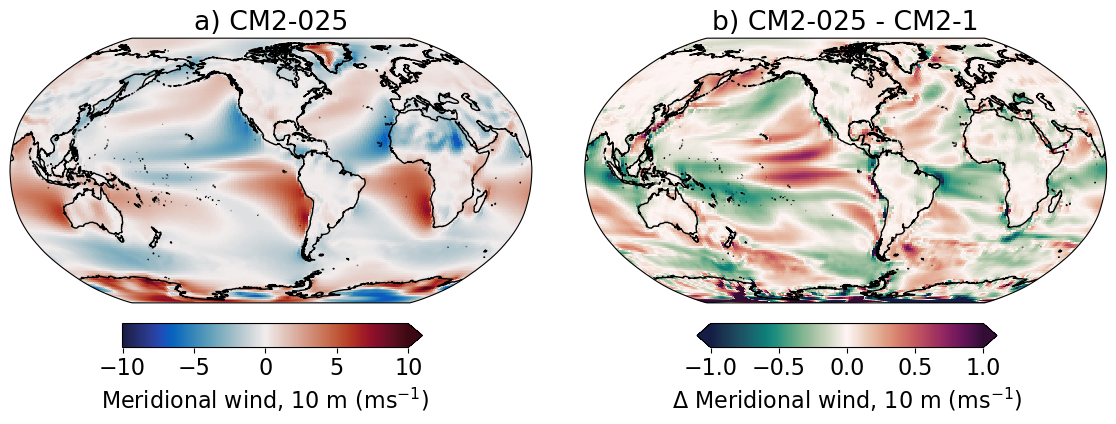

In [62]:
fig = plt.figure(figsize=(15,6))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15) # height_ratios=[1,1,1,1,0.1],

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = v_wind_CM2_025.mean('time').plot(transform=ccrs.PlateCarree(), vmin=-10, vmax=10, cmap=cm.cm.balance, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) CM2-025')

#cbar_ax = fig.add_subplot(gs[4, 0])
cbar_ax = fig.add_axes([0.20, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-10, 11, 5), label='Meridional wind, 10 m (ms$^{-1}$)', extend='max', orientation='horizontal') 

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = (v_wind_CM2_025.mean('time') - v_wind_CM2_1.mean('time')).plot(transform=ccrs.PlateCarree(), vmin=-1, vmax=1, cmap=cm.cm.curl, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) CM2-025 - CM2-1')

cbar_ax = fig.add_axes([0.583, 0.2, 0.2, 0.04])
#cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-1, 1.1, 0.5), label='$\Delta$ Meridional wind, 10 m (ms$^{-1}$)', extend='both', orientation='horizontal') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_v_wind_ACCESS_CM2_diff_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300, transparent=True);

Southern Ocean time series, speed

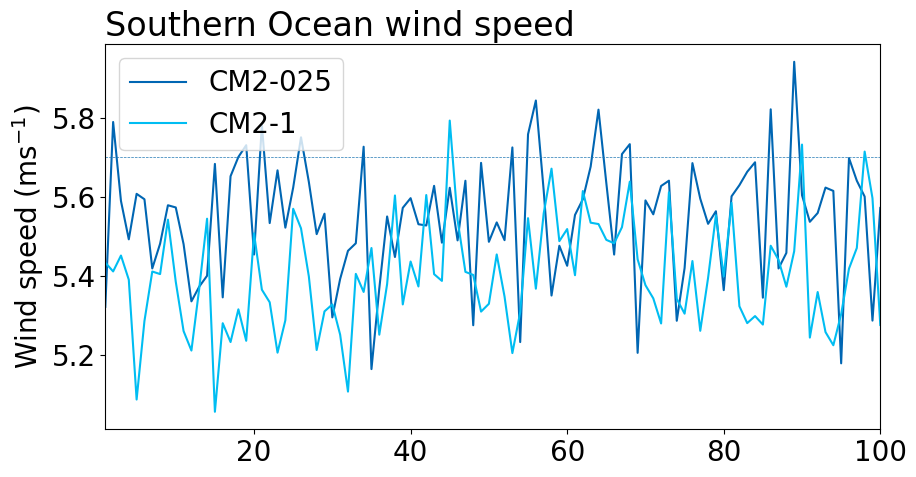

In [203]:
fig = plt.figure(figsize=(10,5))

# PLAY AROUND WITH REGIONAL SELECTION TO FIND MAX VALUES
wind_SO_CM2_025 = wind_CM2_025.sel(lat=slice(-80,-65)).sel(lon=slice(90,180)).mean('lat').mean('lon')
wind_SO_CM2_1   = wind_CM2_1.sel(lat=slice(-80,-65)).sel(lon=slice(90,180)).mean('lat').mean('lon')
mean_p_std = wind_SO_CM2_025.mean()+wind_SO_CM2_025.std()

plt.plot(np.arange(1,101,1), wind_SO_CM2_025, color=CLEX_CobaldBlue, label='CM2-025')
#plt.fill_between(np.arange(1,101,1), mean_p_std, wind_SO_CM2_025, where=wind_SO_CM2_025>mean_p_std)
plt.axhline(mean_p_std, linestyle='--', linewidth=0.5)
plt.plot(np.arange(1,101,1), wind_SO_CM2_1, color=CLEX_SkyBlue, label='CM2-1')
plt.legend()
plt.xlim(1, 100)
plt.title('Southern Ocean wind speed', loc='left')
plt.ylabel('Wind speed (ms$^{-1}$)');

In [204]:
index = []
for ii in range(100):
    if wind_SO_CM2_025[ii] > mean_p_std:
        index = np.append(index, ii)
index = [int(x) for x in index]
index

[1, 17, 18, 20, 25, 33, 52, 54, 55, 63, 66, 67, 85, 88]

In [186]:
index

[0, 9, 17, 37, 48, 51, 61, 79, 92, 96, 98]

In [188]:
wind_large = wind_CM2_025.sel(lat=slice(-90,-50))[index,...].mean('time')

In [157]:
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature

In [205]:
wind_large_c, lon_c = add_cyclic_point(wind_large, coord=wind_CM2_025.sel(lat=slice(-90,-50)).lon)
wind_SO_CM2_025_c, lon_c = add_cyclic_point(wind_CM2_025.sel(lat=slice(-90,-50)).mean('time'), coord=wind_CM2_025.sel(lat=slice(-90,-50)).lon)

In [159]:
# Wilma's 1 km isobath
contour_file = np.load('/g/data/x77/wgh581/Post_Process/Antarctic_slope_contour_u_t_1000m_plt_approach.npz')
contour_xt_ocean = contour_file['lon_along_contour_t']
contour_yt_ocean = contour_file['lat_along_contour_t']

In [144]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [155]:
def figure_1():
    fig = plt.figure(figsize = (20, 18))
    gr = gridspec.GridSpec(2, 2, figure = fig, wspace = -.05, hspace = 0.15); 
    axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
           fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo()),
           fig.add_subplot(gr[1,0], projection = ccrs.SouthPolarStereo()),
           fig.add_subplot(gr[1,1], projection = ccrs.SouthPolarStereo())]
    for ax, lb in zip(axs, ['a) JRA55-do', 'b) CORE', 'c) ERA5', 'd) CM2-025']):
        ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
        ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
        ax.spines['geo']
        ax.text(-0.03, .975, lb, transform=ax.transAxes, size=24, weight='bold')
        ax.patch.set_alpha(0)
        ax.set_boundary(circle, transform=ax.transAxes)
        ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())
    return fig, axs

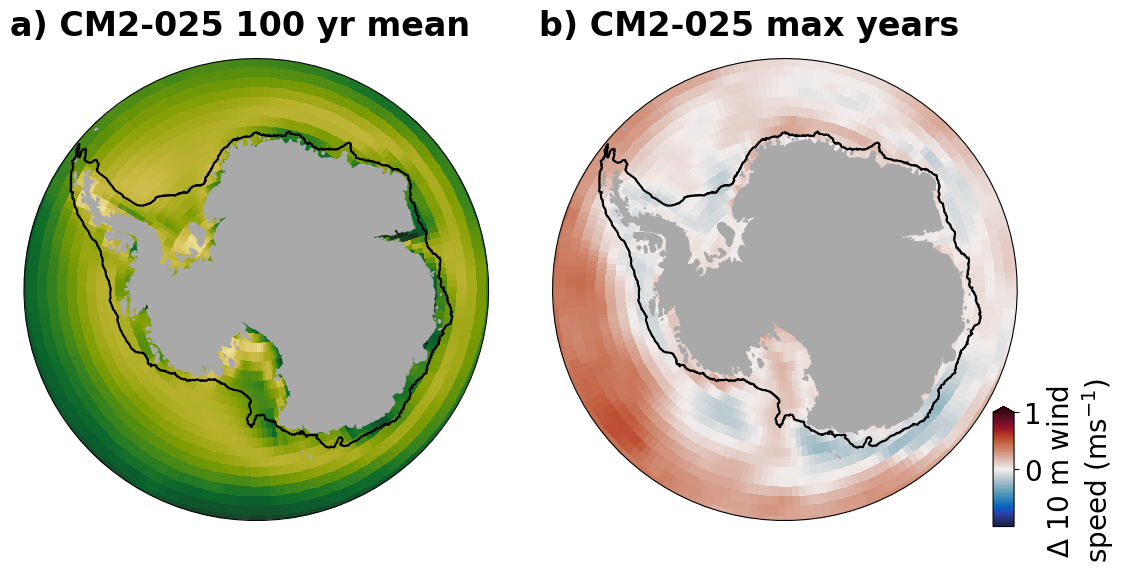

In [206]:
font_size = 24
plt.rcParams['font.size'] = 20

fig = plt.figure(figsize=(14, 6))
gr  = gridspec.GridSpec(1, 2, figure=fig, wspace=-.05, hspace=0.15); 
axs = [fig.add_subplot(gr[0,0], projection = ccrs.SouthPolarStereo()),
    fig.add_subplot(gr[0,1], projection = ccrs.SouthPolarStereo())]
for ax, lb in zip(axs, ['a) CM2-025 100 yr mean', 'b) CM2-025 max years']):
    ax.set_extent([-180, 180, -90, -59.5], ccrs.PlateCarree())
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='darkgrey', facecolor='darkgrey'))
    ax.spines['geo']
    ax.text(-0.03, 1.05, lb, transform=ax.transAxes, size=24, weight='bold')
    ax.patch.set_alpha(0)
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.plot(contour_xt_ocean[:-1], contour_yt_ocean[:-1], color='k', linewidth=1.5, transform=ccrs.PlateCarree())

axs[0].pcolormesh(lon_c, wind_CM2_025.sel(lat=slice(-90,-50))['lat'], wind_SO_CM2_025_c, transform=ccrs.PlateCarree(), cmap=cm.cm.speed, vmin=0, vmax=8, zorder=0)
c = axs[1].pcolormesh(lon_c, wind_CM2_025.sel(lat=slice(-90,-50))['lat'], wind_large_c-wind_SO_CM2_025_c, transform=ccrs.PlateCarree(), cmap=cm.cm.balance, vmin=-1, vmax=1, zorder=0)

cbar_ax  = fig.add_axes([0.85, 0.1, 0.015, 0.2])
cbar = plt.colorbar(c, cax=cbar_ax, label='$\Delta$ 10 m wind \nspeed (ms$^{-1}$)', extend='max', ticks=np.arange(0,4,1)) 

# Finished
save_flag = 0
if save_flag == 1:
    fig_name = 'Fig_wind_ACCESS_CM2_SO.png'
    plt.savefig(fig_path + fig_name, dpi=300);

Note:
- need to change criteria for selecting strong years (closer to AA??)
- EOF to find years? Or to find out if increase/decrease varies with lon.

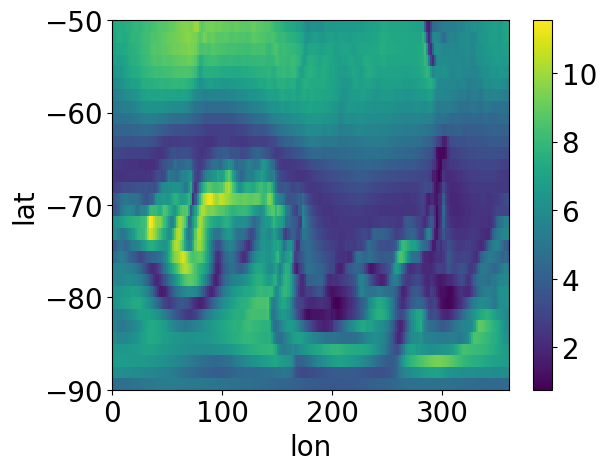

In [184]:
wind_CM2_025.sel(lat=slice(-90,-50)).mean('time').plot()

Multidecadal variability composit (need to load data)

### Surface air temperature

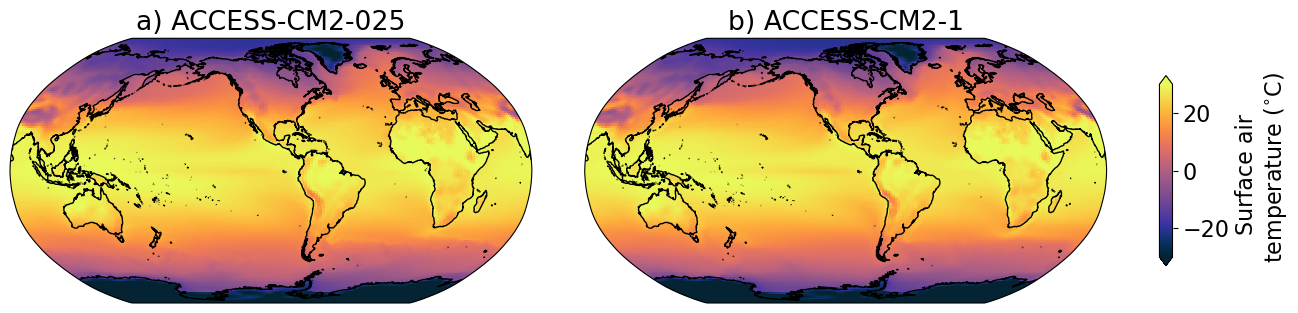

In [49]:
fig = plt.figure(figsize=(15,5))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = (sat_CM2_025.mean('time')-273.15).plot(transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap=cm.cm.thermal, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
(sat_CM2_1.mean('time')-273.15).plot(transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap=cm.cm.thermal, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) ACCESS-CM2-1')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-40, 45, 20), label='Surface air \n temperature ($^{\circ}$C)', extend='both') 
#units_label = evap_OM2_1_clim_mmd.units
#cbar = plt.colorbar(sc, cax=cbar_ax, label='Evaporation ('+units_label+')', extend='max', ticks=np.arange(0,10)) 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_sat_ACCESS_CM2_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

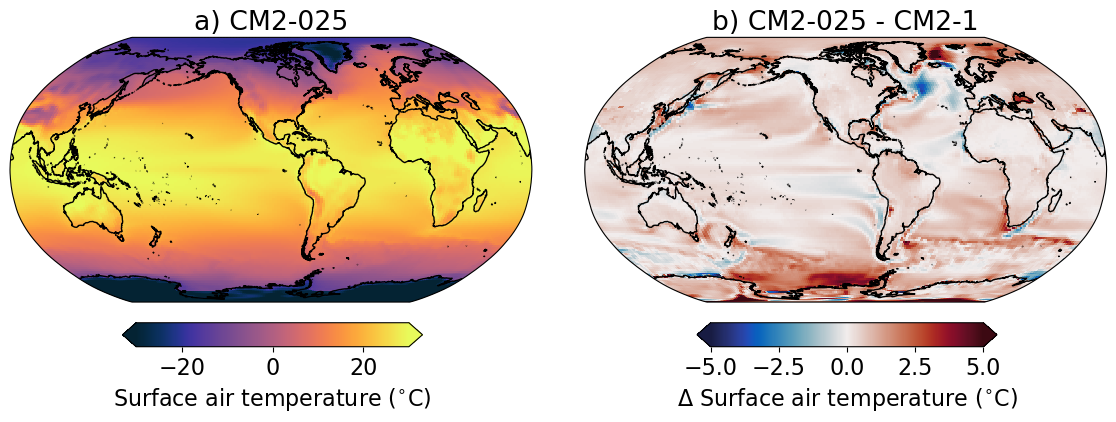

In [12]:
fig = plt.figure(figsize=(15,6))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15) # height_ratios=[1,1,1,1,0.1],

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = (sat_CM2_025.mean('time')-273.15).plot(transform=ccrs.PlateCarree(), vmin=-30, vmax=30, cmap=cm.cm.thermal, add_colorbar=False) 
ax.coastlines(resolution='50m')
plt.title('a) CM2-025')

cbar_ax = fig.add_axes([0.20, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-40, 45, 20), label='Surface air temperature ($^{\circ}$C)', extend='both', orientation='horizontal') 

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = (sat_CM2_025.mean('time') - sat_CM2_1.mean('time')).plot(transform=ccrs.PlateCarree(), vmin=-5, vmax=5, cmap=cm.cm.balance, add_colorbar=False)
ax.coastlines(resolution='50m')
plt.title('b) CM2-025 - CM2-1')

cbar_ax = fig.add_axes([0.583, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-5, 5.1, 2.5), label='$\Delta$ Surface air temperature ($^{\circ}$C)', extend='both', orientation='horizontal') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_sat_ACCESS_CM2_diff_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300, transparent=True);

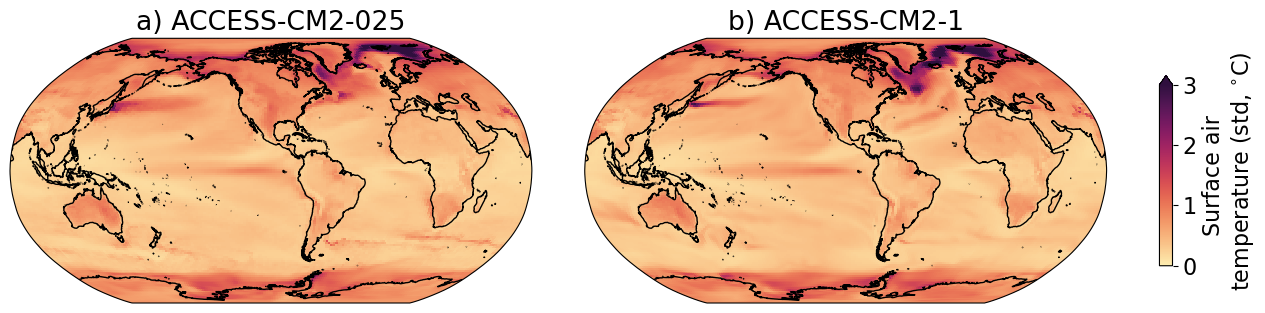

In [63]:
fig = plt.figure(figsize=(15,5))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.05, wspace=0.15)

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = sat_CM2_025.std('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=3, cmap=cm.cm.matter, add_colorbar=False) 
ax.coastlines(resolution='50m')
plt.title('a) ACCESS-CM2-025')

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sat_CM2_1.std('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=3, cmap=cm.cm.matter, add_colorbar=False)
ax.coastlines(resolution='50m')
plt.title('b) ACCESS-CM2-1')

cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 3.1, 1), label='Surface air\n temperature (std, $^{\circ}$C)', extend='max') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_sat_ACCESS_CM2_std_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

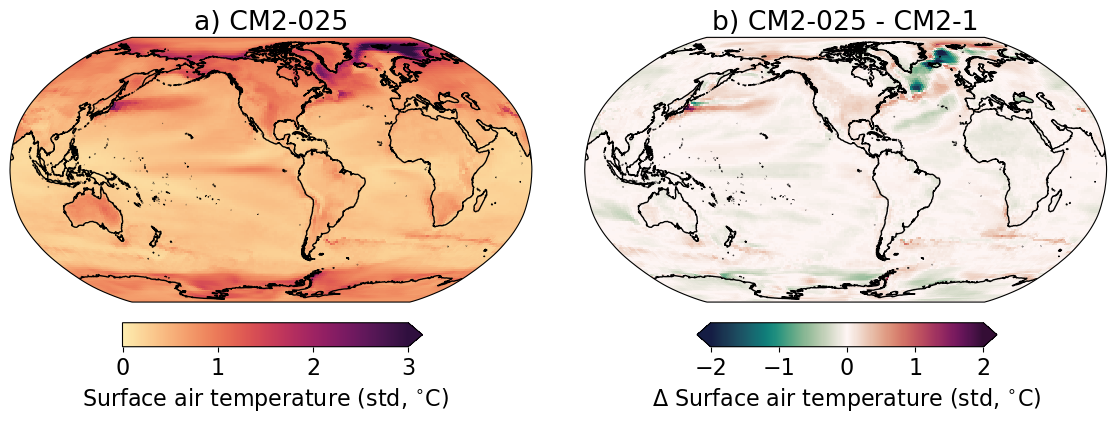

In [64]:
fig = plt.figure(figsize=(15,6))
gs  = gridspec.GridSpec(4, 3, width_ratios=[1, 1, 0.025], hspace=0.01, wspace=0.15) # height_ratios=[1,1,1,1,0.1],

ax = fig.add_subplot(gs[0:4,0], projection=ccrs.Robinson(central_longitude=-100))
sc = sat_CM2_025.std('time').plot(transform=ccrs.PlateCarree(), vmin=0, vmax=3, cmap=cm.cm.matter, add_colorbar=False) 
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('a) CM2-025')

#cbar_ax = fig.add_subplot(gs[4, 0])
cbar_ax = fig.add_axes([0.20, 0.2, 0.2, 0.04])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(0, 3.1, 1), label='Surface air temperature (std, $^{\circ}$C)', extend='max', orientation='horizontal') 

ax = fig.add_subplot(gs[0:4,1], projection=ccrs.Robinson(central_longitude=-100))
sc = (sat_CM2_025.std('time') - sat_CM2_1.std('time')).plot(transform=ccrs.PlateCarree(), vmin=-2, vmax=2, cmap=cm.cm.curl, add_colorbar=False)
ax.coastlines(resolution='50m')
#ax.add_feature(land_50m)
plt.title('b) CM2-025 - CM2-1')

cbar_ax = fig.add_axes([0.583, 0.2, 0.2, 0.04])
#cbar_ax = fig.add_subplot(gs[1:3, 2])
cbar = plt.colorbar(sc, cax=cbar_ax, ticks=np.arange(-2, 2.51, 1), label='$\Delta$ Surface air temperature (std, $^{\circ}$C)', extend='both', orientation='horizontal') 

# Finished
save_flag = 1
if save_flag == 1:
    fig_name = 'Fig_sat_ACCESS_CM2_diff_std_maps.png'
    plt.savefig(fig_path + fig_name, dpi=300);

#### Global mean air temperature

In [71]:
area_CM2 = xr.open_dataset('/g/data/access/projects/access/access-cm2/input_b/cpl_n96/oasis3_areas_N96_06032014.nc')
area_CM2 = area_CM2['um1t.srf']

In [76]:
area_CM2 = area_CM2.rename({'nyt': 'lon','nxt': 'lat'})

In [86]:
sat_global_CM2_025 = (sat_CM2_025.mean('time')*area_CM2).sum('lon').sum('lat') / area_CM2.sum('lon').sum('lat')
sat_global_CM2_1   = (sat_CM2_1.mean('time')*area_CM2).sum('lon').sum('lat') / area_CM2.sum('lon').sum('lat')

In [87]:
print('CM2_025 global mean temp: ', np.round(sat_global_CM2_025.values-273.15, 2), 'C')
print('CM2_1 global mean temp: ', np.round(sat_global_CM2_1.values-273.15, 2), 'C')

CM2_025 global mean temp:  15.75 C
CM2_1 global mean temp:  15.32 C


15.749993896484398

---

### Calculate and save wind speed

#### CM2-025

In [7]:
start_time = '0400-01-01'
end_time   = '0499-12-31'

In [ ]:
u_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s03i209', session_CM2, start_time=start_time, end_time=end_time)
v_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s03i210', session_CM2, start_time=start_time, end_time=end_time)

In [9]:
u_CM2_025 = u_CM2_025.sel(time=slice(start_time, end_time))#.mean('time')
v_CM2_025 = v_CM2_025.sel(time=slice(start_time, end_time))#.mean('time')

Velocity is on a C-grid. Use xgcm to deal with coordinates. 

In [10]:
# Create grid
import xgcm
ds = xr.Dataset(coords={"lon": (["lon"], v_CM2_025.lon.values, {"axis": "X"},),
                        "lon_u": (["lon_u"], u_CM2_025.lon_u.values, {"axis": "X", "c_grid_axis_shift": -0.5},),
                        "lat": (["lat"], u_CM2_025.lat.values, {"axis": "Y"},),
                        "lat_v": (["lat_v"], v_CM2_025.lat_v.values, {"axis": "Y", "c_grid_axis_shift": -0.5},),
                       })

grid = xgcm.Grid(ds)

In [11]:
# Interpolate onto common axes
u_CM2_025_int = grid.interp(u_CM2_025, axis="X")
v_CM2_025_int = grid.interp(v_CM2_025, axis="Y")

Speed

In [12]:
# Speed
wind_speed_CM2_025 = np.sqrt(u_CM2_025_int**2 + v_CM2_025_int**2)

In [14]:
# Annual average
wind_speed_CM2_025 = wind_speed_CM2_025.resample(time='Y').mean()

In [16]:
# Load data into memory
wind_speed_CM2_025 = wind_speed_CM2_025.load()

In [19]:
# Save data
wind_speed_CM2_025.to_netcdf(path_to_data + 'wind_speed_10m_400_499.nc')

Individual components

In [12]:
# Make sure time dimension is a coordinate (only an issue for u, not v)
u_CM2_025_int['time'] = u_CM2_025.time

In [13]:
# Save monthly data: u
u_CM2_025_int = u_CM2_025_int.load()
u_CM2_025_int.to_netcdf(path_to_data + 'u_wind_10m_400_499_monthly.nc')

In [14]:
# Save monthly data: v
v_CM2_025_int = v_CM2_025_int.load()
v_CM2_025_int.to_netcdf(path_to_data + 'v_wind_10m_400_499_monthly.nc')

In [24]:
# Annual average
u_CM2_025_y = u_CM2_025_int.resample(time='Y').mean()
v_CM2_025_y = v_CM2_025_int.resample(time='Y').mean()

In [27]:
# Load data into memory: u
u_CM2_025_y = u_CM2_025_y.load()

In [28]:
u_CM2_025_y.to_netcdf(path_to_data + 'u_wind_10m_400_499.nc')

In [29]:
# Load data into memory: v
v_CM2_025_y = v_CM2_025_y.load()
v_CM2_025_y.to_netcdf(path_to_data + 'v_wind_10m_400_499.nc')

#### CM2-1

Atmospheric data is not in database. Need to import separately.

In [33]:
year  = np.arange(400,500,1)
month = np.arange(1,13,1)#['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
path_bz687 = '/g/data/p73/archive/non-CMIP/ACCESS-CM2/bz687/history/atm/netCDF/'

In [ ]:
u_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s03i209', session_CM2, start_time=start_time, end_time='0400-12-31')

In [ ]:
v_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s03i210', session_CM2, start_time=start_time, end_time='0400-12-31')

In [38]:
# Create grid once (use same as for CM2-025)
import xgcm
ds = xr.Dataset(coords={"lon": (["lon"], v_CM2_025.lon.values, {"axis": "X"},),
                        "lon_u": (["lon_u"], u_CM2_025.lon_u.values, {"axis": "X", "c_grid_axis_shift": -0.5},),
                        "lat": (["lat"], u_CM2_025.lat.values, {"axis": "Y"},),
                        "lat_v": (["lat_v"], v_CM2_025.lat_v.values, {"axis": "Y", "c_grid_axis_shift": -0.5},),
                       })

grid = xgcm.Grid(ds)

Speed

In [54]:
%%time
for yy in year:
    for mm in month:
        # Get correct file name
        if mm < 10:
            file_name = 'bz687a.pm0' + str(yy) + '0' + str(mm) + '_mon.nc'
        else:
            file_name = 'bz687a.pm0' + str(yy) + str(mm) + '_mon.nc'
        # Load u and v wind for this year and month
        data = xr.open_dataset(path_bz687 + file_name)
        u_tmp = data.fld_s03i209
        v_tmp = data.fld_s03i210
        # Regrid onto common axis
        u_int = grid.interp(u_tmp, axis="X")
        v_int = grid.interp(v_tmp, axis="Y")
        # Calculate wind speed
        speed_tmp = np.sqrt(u_int**2 + v_int**2)
        # Concatenate data in time
        if yy == 400 and mm == 1:
            speed = speed_tmp
        else:
            speed = xr.concat([speed, speed_tmp], dim='time')

CPU times: user 7min 46s, sys: 2min 50s, total: 10min 37s
Wall time: 27min 59s


In [56]:
# Annual average
wind_speed_CM2_1 = speed.resample(time='Y').mean()

In [58]:
# Load data into memory
wind_speed_CM2_1 = wind_speed_CM2_1.load()

In [59]:
# Save data
wind_speed_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/wind_speed_10m_400_499_CM2_1.nc')

Individual components

In [ ]:
%%time
for yy in year:
    for mm in month:
        # Get correct file name
        if mm < 10:
            file_name = 'bz687a.pm0' + str(yy) + '0' + str(mm) + '_mon.nc'
        else:
            file_name = 'bz687a.pm0' + str(yy) + str(mm) + '_mon.nc'
        # Load u and v wind for this year and month
        data = xr.open_dataset(path_bz687 + file_name)
        u_tmp = data.fld_s03i209
        #v_tmp = data.fld_s03i210
        # Regrid onto common axis
        u_int = grid.interp(u_tmp, axis="X")
        #v_int = grid.interp(v_tmp, axis="Y")
        # Concatenate data in time
        if yy == 400 and mm == 1:
            u = u_tmp
            #v = v_tmp
        else:
            u = xr.concat([u, u_tmp], dim='time')
            #v = xr.concat([v, v_tmp], dim='time')

In [33]:
v_CM2_1 = v.load()
v_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/v_wind_10m_400_499_CM2_1.nc')

In [17]:
u_CM2_1 = u.load()
u_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/u_wind_10m_400_499_CM2_1.nc')

In [40]:
u_int = grid.interp(u_wind_CM2_1, axis="X")

In [39]:
u_wind_CM2_1

<xarray.DataArray 'fld_s03i209' (time: 1200, lat: 144, lon_u: 192)>
[33177600 values with dtype=float32]
Coordinates:
  * time      (time) object 0400-01-16 12:00:00 ... 0499-12-16 12:00:00
  * lat       (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon_u     (lon_u) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height    float64 ...
    height_0  float64 ...
Attributes:
    standard_name:    eastward_wind
    long_name:        10 METRE WIND U-COMP
    units:            m s-1
    um_stash_source:  m01s03i209
    cell_methods:     time: mean
    grid_mapping:     latitude_longitude

In [42]:
u_int['time'] = u_wind_CM2_1.time

In [45]:
u_int.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/u_wind_10m_400_499_CM2_1.nc')

In [46]:
v_int = grid.interp(v_wind_CM2_1, axis="Y")

In [49]:
v_int.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/v_wind_10m_400_499_CM2_1.nc')

### Calculate and save surface air temperature

#### CM2-025

In [ ]:
sat_CM2_025 = cc.querying.getvar(expt_CM2_025, 'fld_s00i024', session_CM2, start_time=start_time, end_time=end_time)

In [10]:
sat_CM2_025 = sat_CM2_025.sel(time=slice(start_time, end_time))

In [12]:
sat_CM2_025 = sat_CM2_025.resample(time='Y').mean()

In [14]:
sat_CM2_025 = sat_CM2_025.load()

In [15]:
# Save data
sat_CM2_025.to_netcdf(path_to_data + 'sat_400_499.nc')

#### CM2-1

In [22]:
%%time
for yy in year:
    for mm in month:
        # Get correct file name
        if mm < 10:
            file_name = 'bz687a.pm0' + str(yy) + '0' + str(mm) + '_mon.nc'
        else:
            file_name = 'bz687a.pm0' + str(yy) + str(mm) + '_mon.nc'
        # Load sat for this year and month
        data = xr.open_dataset(path_bz687 + file_name)
        sat_tmp = data.fld_s00i024
        # Concatenate data in time
        if yy == 400 and mm == 1:
            sat = sat_tmp
        else:
            sat = xr.concat([sat, sat_tmp], dim='time')

CPU times: user 7min 25s, sys: 2min 25s, total: 9min 50s
Wall time: 27min 31s


In [24]:
sat_CM2_1 = sat.resample(time='Y').mean()

In [25]:
sat_CM2_1 = sat_CM2_1.load()

In [26]:
sat_CM2_1.to_netcdf(path_to_data + 'Comparison_ACCESS_CM2_1/sat_400_499_CM2_1.nc')